In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
def plot_decision_boundary(model, X, y):

    """
        Plots the decision boundary created by a model predicting on X
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    

    # Create X values (we're going to make the predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together


    # Make predictions

    y_pred = model.predict(x_in)


    # Check for multi-class 

    if len(y_pred[0]) > 1:

        print("Doing Multi-Class Classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:

        print("Doing Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # Plot the decision boundary

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [3]:
n_samples = 1500

X, y = make_circles(n_samples,
                       noise = 0.05,
                       random_state = 100)


In [4]:
# Creating test and training data

X_train, y_train = X[:1200], y[:1200]
X_test, y_test = X[1200:], y[1200:]


In [5]:
circles = pd.DataFrame({
    "X0" : X[:,0],
    "X1" : X[:, 1],
    "y" : y
})

circles.head()

,X0,X1,y
0,-0.880686,-0.144891,1
1,-0.717075,0.211998,1
2,-0.734318,-0.210785,1
3,-0.350501,0.738722,1
4,-0.989603,0.190770,0


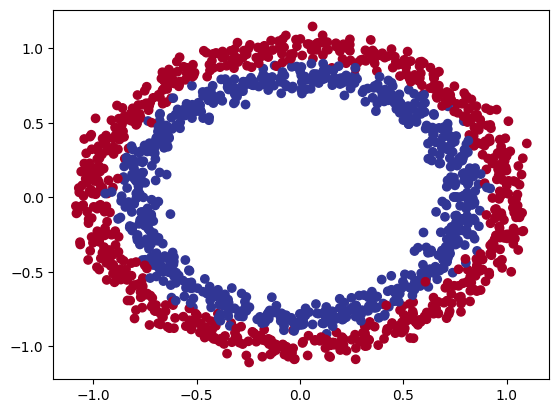

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [7]:
# set random seed

tf.random.set_seed(42)

#               1. Create model

model_1 = tf.keras.Sequential([

    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#               2. Compile model

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



#           Finding the best Learning Rate

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * 10**(epochs/20))



#               1. Fit the model

history_1 = model_1.fit(X_train, y_train, epochs = 100, callbacks = [learning_rate_scheduler])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4869 - loss: 0.6916 - learning_rate: 1.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4882 - loss: 0.6914 - learning_rate: 1.1220e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6912 - learning_rate: 1.2589e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5027 - loss: 0.6910 - learning_rate: 1.4125e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5103 - loss: 0.6908 - learning_rate: 1.5849e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.6905 - learning_rate: 1.7783e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 0.6903 - learning_rate: 1.9953e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5160 - loss: 0.6900 - learning_rate: 2.2387e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 0.6897 - learning_

<Axes: xlabel='Epochs'>

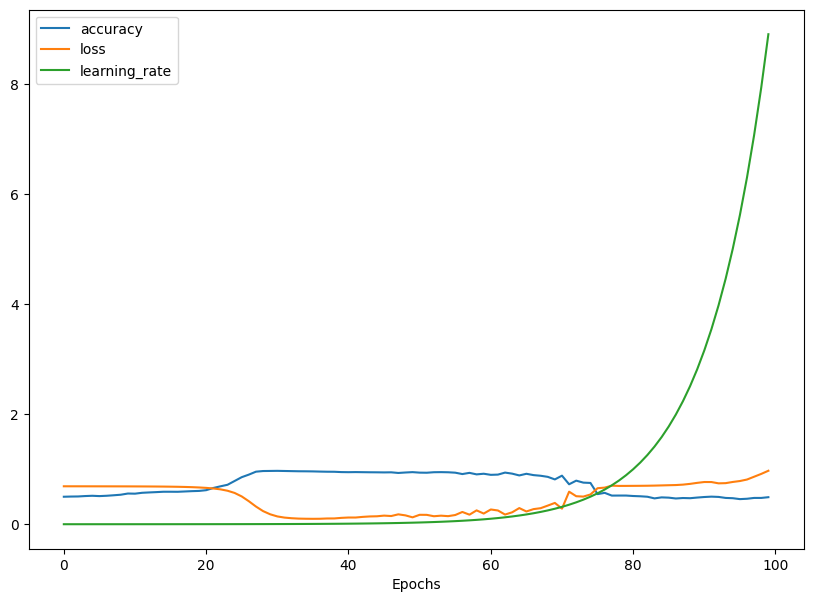

In [8]:
pd.DataFrame(history_1.history).plot(figsize = (10, 7), xlabel = "Epochs")

In [9]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate VS  Loss')

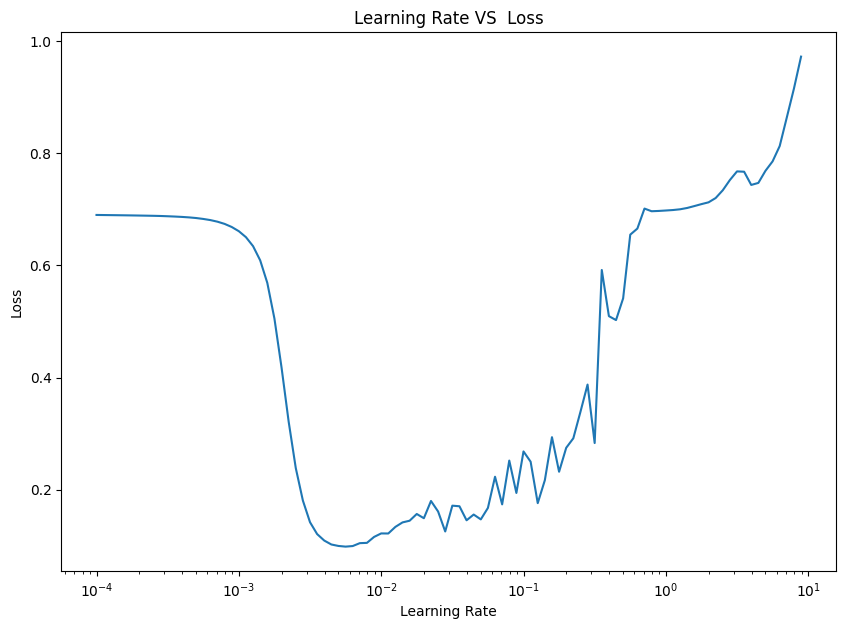

In [10]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_1.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS  Loss")

In [ ]:
# Let's create model on the basis of ideal learning rate

# set random seed

tf.random.set_seed(42)

#                   1. Create model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])



#                   2. Compile model

model_2.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ["accuracy"])



#                   3. Fit the model

history_2 = model_2.fit(X_train, y_train, epochs = 150)

Epoch 1/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5224 - loss: 0.6934
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5846 - loss: 0.6772 
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6950 - loss: 0.6420 
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.5052 
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9415 - loss: 0.2573 
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.1568 
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9466 - loss: 0.1339 
Epoch 8/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9408 - loss: 0.1276 
Epoch 9/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9446 - loss: 0.1303 
Epoch 10/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.1322 
Epoch 11/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9463 - loss: 0.1252 
Epoch 12/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [12]:
model_2.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.0902  


[0.08895479887723923, 0.9633333086967468]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
Doing Binary Classification


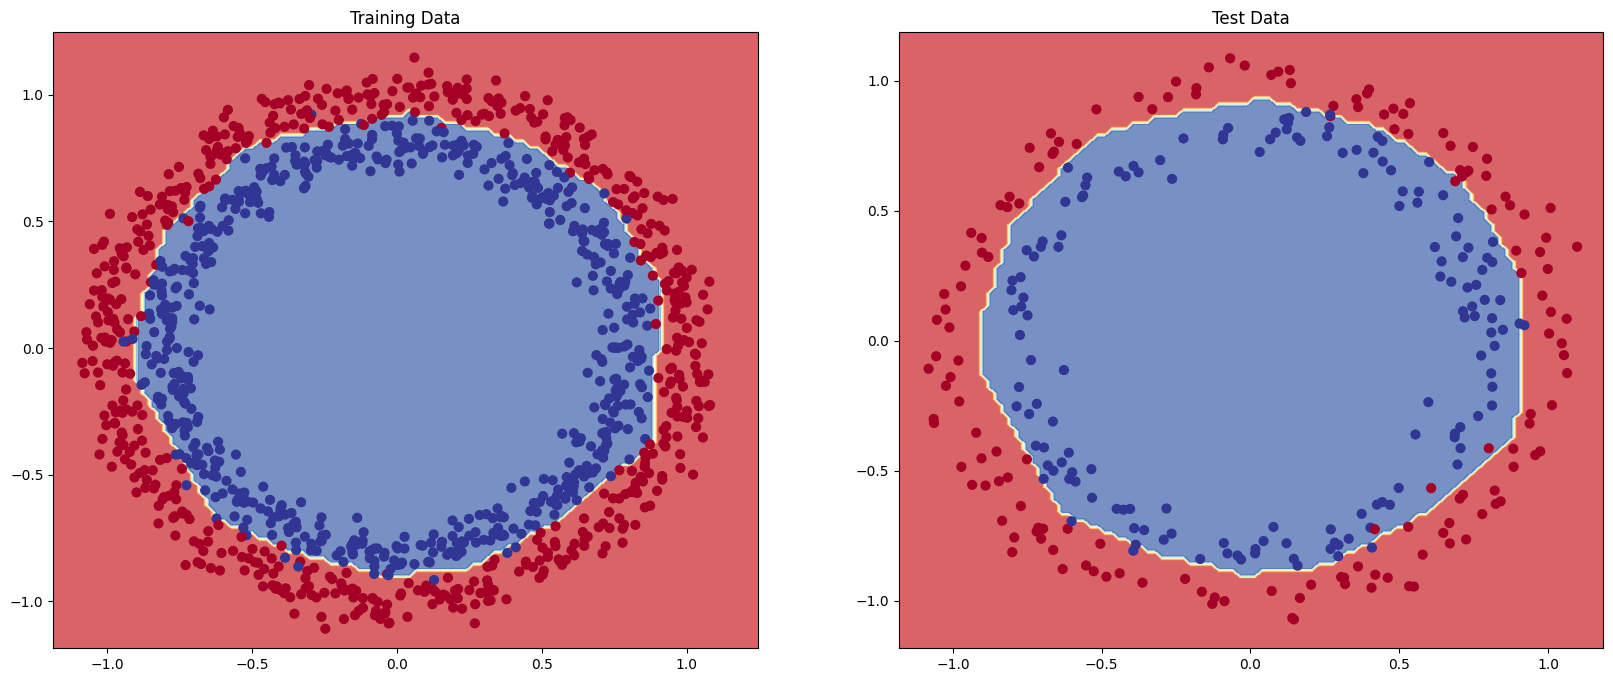

In [13]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model = model_2,
                       X = X_train,
                       y = y_train)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model = model_2,
                       X = X_test,
                       y = y_test)